In [1]:
import xarray as xr

In [2]:
data = xr.load_dataset("data\steinmetz_2017-01-08_Muller.nc")
data

<xarray.Dataset>
Dimensions:             (trial: 261, time: 250, cell: 1268, waveform_component: 3, sample: 82, probe: 384, brain_area_lfp: 5, spike_id: 1836009)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 256 257 258 259 260 261
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1264 1265 1266 1267 1268
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'CA1' 'DG' 'LP' 'PO' 'VISam'
  * spike_id            (spike_id) int32 1 2 3 4 ... 1836007 1836008 1836009
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 50 0 100 0 50 0 0 ... 0 100 0 100 0 100 0
    contrast_right      (trial) int8 0 50 25 100 50 50 ... 50 100 50 100 25 25
    gocue               (trial) float64 0.9828 0.902 1.114 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.272 1.104 1.402 1.053 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -27.6 ... 0.1221
    spike_time          (spike_id) float32 2.363 2.385 1.451 ... 1.651 0.5142
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1268 1268 1268 1268 1268
    spike_trial         (spike_id) uint32 1 1 2 2 2 2 ... 205 205 205 213 252
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

# Analysis: Pupil Diameter

In [8]:
dd = data[["pupil_area","pupil_x","pupil_y"]]
dd

<xarray.Dataset>
Dimensions:     (trial: 261, time: 250)
Coordinates:
  * trial       (trial) int32 1 2 3 4 5 6 7 8 ... 255 256 257 258 259 260 261
  * time        (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.47 2.48 2.49 2.5
Data variables:
    pupil_area  (trial, time) float64 2.636 2.622 2.621 ... 0.07115 0.06507
    pupil_x     (trial, time) float64 -0.7537 -0.7744 -0.7489 ... 0.8159 0.8239
    pupil_y     (trial, time) float64 1.717 1.565 1.606 ... -0.4639 -0.4615
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

In [10]:
df = dd.to_dataframe().reset_index()
df

,trial,time,pupil_area,pupil_x,pupil_y
0,1,0.01,2.635524,-0.753684,1.716748
1,1,0.02,2.622296,-0.774388,1.565163
2,1,0.03,2.621289,-0.748939,1.605625
3,1,0.04,2.657471,-0.766579,1.639666
4,1,0.05,2.617581,-0.723780,1.691082
...,...,...,...,...,...
65245,261,2.46,0.073435,0.847978,-0.477572
65246,261,2.47,0.073991,0.869135,-0.386005
65247,261,2.48,0.071603,0.865792,-0.528977
65248,261,2.49,0.071153,0.815925,-0.463878


In [15]:
import matplotlib.pyplot as plt

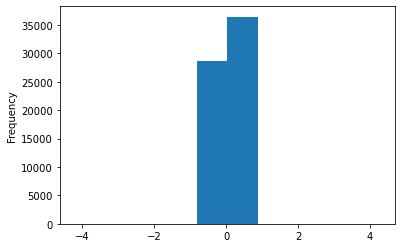

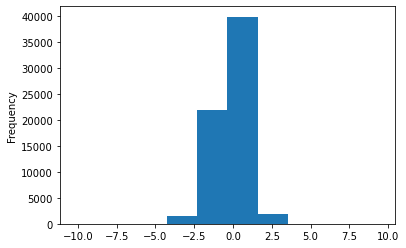

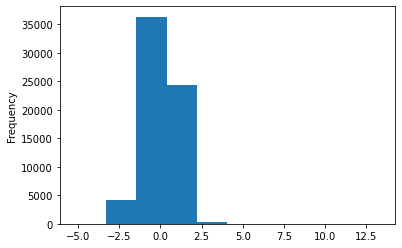

In [18]:
df["pupil_area"].plot.hist();
plt.figure()
df["pupil_x"].plot.hist();
plt.figure()
df["pupil_y"].plot.hist();


In [20]:
import seaborn as sns

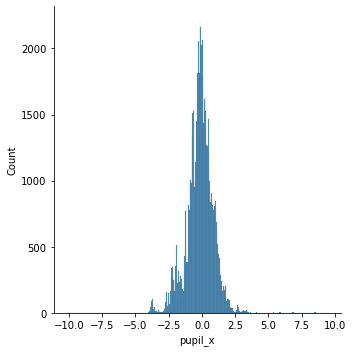

In [21]:
sns.displot(df, x="pupil_x")

In [22]:
df.melt()

,variable,value
0,trial,1.000000
1,trial,1.000000
2,trial,1.000000
3,trial,1.000000
4,trial,1.000000
...,...,...
326245,pupil_y,-0.477572
326246,pupil_y,-0.386005
326247,pupil_y,-0.528977
326248,pupil_y,-0.463878


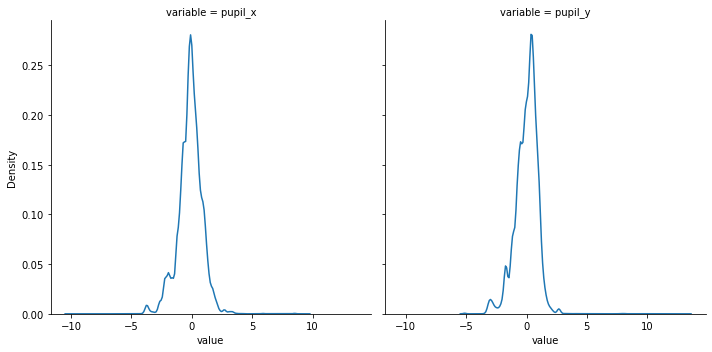

In [56]:
sns.displot(df[["pupil_x","pupil_y"]].melt(), x="value", col="variable", kind="kde")

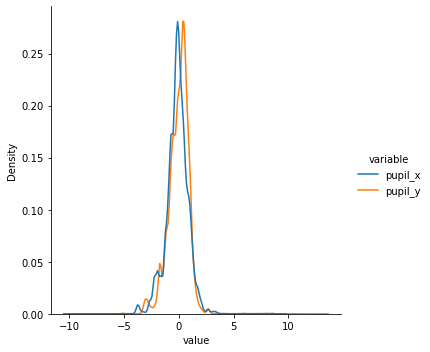

In [24]:
sns.displot(df[["pupil_x","pupil_y"]].melt(), x="value", hue="variable", kind="kde")

## Split dataset

In [27]:
dat = data[["contrast_left","contrast_right","pupil_x","pupil_y"]].to_dataframe()
dat

contrast_left  contrast_right   pupil_x   pupil_y
trial time                                                   
1     0.01             50               0 -0.753684  1.716748
      0.02             50               0 -0.774388  1.565163
      0.03             50               0 -0.748939  1.605625
      0.04             50               0 -0.766579  1.639666
      0.05             50               0 -0.723780  1.691082
...                   ...             ...       ...       ...
261   2.46              0              25  0.847978 -0.477572
      2.47              0              25  0.869135 -0.386005
      2.48              0              25  0.865792 -0.528977
      2.49              0              25  0.815925 -0.463878
      2.50              0              25  0.823949 -0.461531

[65250 rows x 4 columns]

In [49]:
query_left = (dat["contrast_left"] == 100) & (dat["contrast_right"] == 0)
query_right = (dat["contrast_left"] == 0) & (dat["contrast_right"] == 100)
dfd = dat[query_left | query_right].copy()
dfd["TrialType"] = "Right"
dfd.loc[dfd["contrast_left"] == 100, "TrialType"] = "Left"
dfd[["contrast_left", "contrast_right", "TrialType"]].value_counts()

contrast_left  contrast_right  TrialType
0              100             Right        15000
100            0               Left          9000
dtype: int64

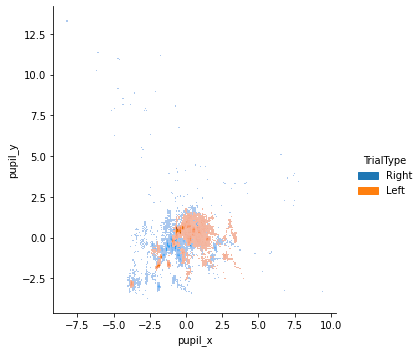

In [46]:
sns.displot(dfd, x="pupil_x", y="pupil_y", hue="TrialType")

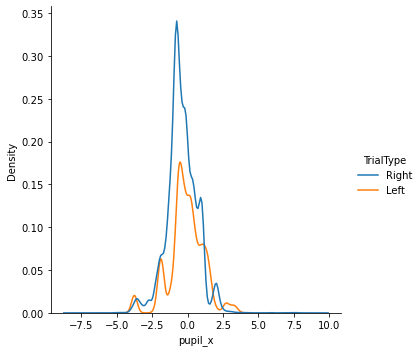

In [48]:
sns.displot(dfd, x="pupil_x", hue="TrialType", kind="kde")

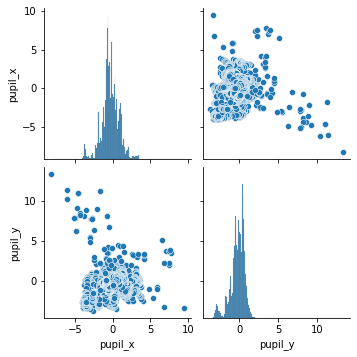

In [50]:
sns.pairplot(dfd[["pupil_x", "pupil_y"]])

## Analysis: Pupil Area in realtion to feedback

In [58]:
r2 = data[["feedback_type", "pupil_area"]].to_dataframe()
r2

feedback_type  pupil_area
trial time                           
1     0.01            1.0    2.635524
      0.02            1.0    2.622296
      0.03            1.0    2.621289
      0.04            1.0    2.657471
      0.05            1.0    2.617581
...                   ...         ...
261   2.46            NaN    0.073435
      2.47            NaN    0.073991
      2.48            NaN    0.071603
      2.49            NaN    0.071153
      2.50            NaN    0.065070

[65250 rows x 2 columns]

In [60]:
r2.dropna().reset_index()

,trial,time,feedback_type,pupil_area
0,1,0.01,1.0,2.635524
1,1,0.02,1.0,2.622296
2,1,0.03,1.0,2.621289
3,1,0.04,1.0,2.657471
4,1,0.05,1.0,2.617581
...,...,...,...,...
37745,151,2.46,-1.0,0.086961
37746,151,2.47,-1.0,0.086086
37747,151,2.48,-1.0,0.086298
37748,151,2.49,-1.0,0.083637


In [61]:
sns.boxplot?

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 

<AxesSubplot:xlabel='feedback_type', ylabel='pupil_area'>

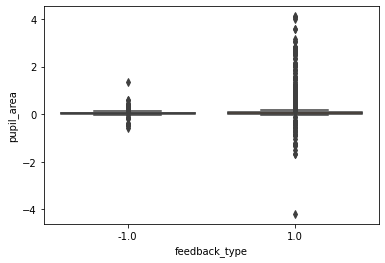

In [63]:
sns.boxplot(data=r2, x="feedback_type", y="pupil_area")

In [74]:
import glob
filenames = glob.glob("data/*.nc")
data_list = []
for filename in filenames:
    temp = xr.load_dataset(filename)
    data_list.append(temp[["feedback_type", "pupil_area"]].to_dataframe().reset_index())

In [75]:
data_list

[       trial  time  feedback_type  pupil_area
 0          1  0.01            1.0    0.165841
 1          1  0.02            1.0    0.158668
 2          1  0.03            1.0    0.169667
 3          1  0.04            1.0    0.172513
 4          1  0.05            1.0    0.176774
 ...      ...   ...            ...         ...
 90995    364  2.46            NaN    0.117658
 90996    364  2.47            NaN    0.120560
 90997    364  2.48            NaN    0.113835
 90998    364  2.49            NaN    0.109935
 90999    364  2.50            NaN    0.119929
 
 [91000 rows x 4 columns],
         trial  time  feedback_type  pupil_area
 0           1  0.01           -1.0    0.026828
 1           1  0.02           -1.0    0.021461
 2           1  0.03           -1.0    0.032008
 3           1  0.04           -1.0    0.040117
 4           1  0.05           -1.0    0.038099
 ...       ...   ...            ...         ...
 100245    401  2.46            NaN    0.034014
 100246    401  2.47   